In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd

# CLT: Exercise 8.32 Grimmett
A fair die is thrown 12000 times. Find $a$ and $b$ such that $\mathbb{P}(1900<S<2200)\approx \int_a^b \frac{1}{\sqrt{2\pi}}e^{-x^2/2}dx$.

In [2]:
p = 1/6
n = 12000
x = stats.bernoulli(p).rvs(size=(n, 10000)) # x is a matrix of bernoulli samples with size 12000 x 10000
print('shape x', x.shape)
s = np.sum(x, axis=0) # axis=0 sums the values of each column
print('len s', len(s))

shape x (12000, 10000)
len s 10000


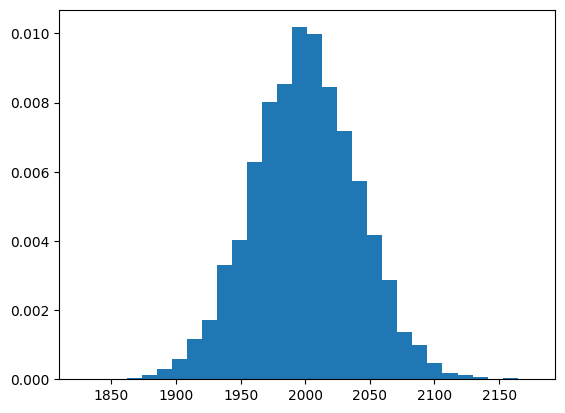

In [7]:
# let's look at the distribution of S, which looks indeed like a normal
_, _, _, = plt.hist(s, bins=30, density=True)

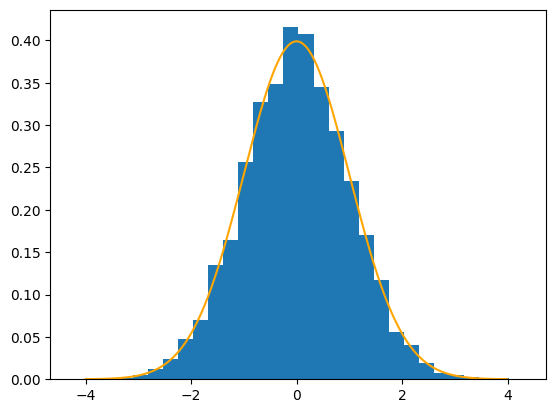

In [6]:
# Though the CLT tells us that we need to normalise S to find the normal(0, 1). Indeed:
_, _, _, = plt.hist((s-n*p)/(np.sqrt(p*(1-p)*n)), bins=30, density=True)
plt.plot(np.arange(-4, 4, 0.01), stats.norm.pdf(np.arange(-4, 4, 0.01)), color='orange')

In [50]:
# a and b found using the theory
b = (2200 - n*p) / (np.sqrt(n*p*(1-p)))
a = (1900 - n*p) / (np.sqrt(n*p*(1-p)))
stats.norm().cdf(b) - stats.norm().cdf(a)

0.9928465791037808

In [51]:
# let's reply to the question using the simulations
estim_prob = np.mean((s<2200) & (s>1900))
estim_prob

0.9929

# Random walk: exercise 8 from Feller
We consider a random walk that starts from 0. At each step, with probability $p$ it goes up of 1 and with probability $q=1-p$ it goes down -1. There is a boundary $M$ that is such that whenever we hit it, at the next step we either stay there with probability $p$ or go down -1 with probability $q$. What is the mean value of times the process hits the boundary $M$ before hitting 0, if the process starts from 0?

We solve this theoretically, now we need to simulate the process to get the answer. This is a possible solution.

In [9]:
def hit_times_rw(M, p, num_experiment):

  X = stats.bernoulli(p) # each step we sample from a bernollli
  count_touch_M = np.zeros(num_experiment) # here we count how many times we hit M before hitting 0, one for each experiment


  for i in range(num_experiment):
    S = 0 # this will record the state of the r.w. in this simulation
    while S >= 0: # if S goes negative, end of the game

      # first, we need to increment S. We need to pay attention because if we are at M the rule is different:
      if S != M: # if S is not M, it can go up or down of 1 and we can achieve that transforming a Bernoulli
        S += 2*X.rvs() - 1
      else: # if S is at the boundary, we need to sample differently (because it cannot go up)
        S += X.rvs() - 1 # this value is 0 w.p. p and - 1 with probability q

      # now, we need to check if we have hit the boundary or got to 0
      if S == M: # if you reached M with your move, you want to increase the counter
        count_touch_M[i] += 1
      if S == 0: # if you have reached 0, you want to stop this experiment and start a new one
        break # You can do that with the command break (which tells Python to get out of the while and start a new iteration of the for loop

  return np.mean(count_touch_M) # we want to know the expected value, so we take the mean over all the counts of the different experiments

In [10]:
hit_times_rw(10, 1/2, 1000)

1.118

In [11]:
p = 1/3
M = 5
print(hit_times_rw(M, p, 10000))
print((p/(1-p))**M)

0.0343
0.031249999999999983
